In [6]:
## Probando funciones para ccbhash
import r2pipe
from hashlib import blake2b
import time
from statistics import mean
import matplotlib.pyplot as plt 
import getopt, sys
import numpy

def feature_plot(features: list, xlabel: str, ylabel: str, title: str):
    res = {}
    for x in features:
        res[x] = features.count(x)

    x = []
    y = []
    for x_val, y_val in sorted(res.items()):
        x.append(x_val)
        y.append(y_val)

    for i in range(0, max(res)):
        if x.count(i) == 0:
            x.append(i)
            y.append(0)

    plt.bar(x, y) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(title) 
    plt.show() 

# Argumentos que permite CCBHash
argument_list = sys.argv[1:]
options = 'hvw:'
long_options = ['help', 'verbose', 'weights=']

# Verbose: True -> Se utiliza más espacio (más bits por atributo o más atributos)
verbose = False

# Pesos por defecto para la comparación de CCBHash
weights = {'name': 0.01, 
            #'size': 0.05, 
            'indegree': 0.03,
            'outdegree': 0.03, 
            'nlocals': 0.03, 
            'nargs': 0.03,
            'ninstrs': 0.13, 
            'ccomplexity': 0.14, 
            #'edges': 0, 
            'nblocks': 0.04,
            'cfg': 0.28,
            'opcodes': 0.28}

def features_to_hashes(features: dict[str, ]):
    fuzzy_hash = {}
    for feature, value in features.items():
        if feature == 'name':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'indegree':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'outdegree':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'nlocals':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'nargs':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'ninstrs':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'ccomplexity':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'nblocks':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'cfg':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'opcodes':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()

try:
    # Parsing argument
    arguments, values = getopt.getopt(argument_list, options, long_options)
     
    # checking each argument
    for arg, val in arguments:
 
        if arg in ('-h', '--help'):
            print('Usage: fuzzy_hashing.py [-h] [-w list_of_weights]')

        elif arg in ('-v', '--verbose'):
            verbose = True
            print('Verbose')
             
        elif arg in ('-w', '--weights'):
            val = val.replace('[', '').replace(']', '')
            w_vals = list(map(float, val.split(',')))
            w_vals = [x/sum(w_vals) for x in w_vals]
            w_vals = w_vals + [0]*(len(weights)-len(w_vals))
            i = 0
            for key in weights.keys():
                weights[key] = w_vals[i]
                i += 1
            print(f'Weights: {weights}')

except getopt.error as err:
    # output error, and return with an error code
    print (str(err))

print()

'''
files = ["/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/e8337d20e27cb23f417f628e4b0ba1985ada02d939669fff9570313050a79b51",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/75bdbc2a0f30cc0e8132d83c781580eb8fb0c4248cdb3907f96b14ffd110cfa7",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/be22645c61949ad6a077373a7d6cd85e3fae44315632f161adc4c99d5a8e6844",
         "/Users/pabloperezjimenez/Desktop/samples/Wannacry/4186675cb6706f9d51167fb0f14cd3f8fcfb0065093f62b10a15f7d9a6c8d982",
         "/Users/pabloperezjimenez/Desktop/samples/Wannacry/09a46b3e1be080745a6d8d88d6b5bd351b1c7586ae0dc94d0c238ee36421cafa",
         "/Users/pabloperezjimenez/Desktop/onieva/9cee5522a7ca2bfca7cd3d9daba23e9a30deb6205f56c12045839075f7627297_unpacked.exe",
         "/Users/pabloperezjimenez/Desktop/Informatica/AnalisisMalware/finalProject/malwarepoc.exe",
         "/Users/pabloperezjimenez/Desktop/Informatica/AnalisisMalware/Malware_Lab5/LabV_02.exe",
         "/Users/pabloperezjimenez/Desktop/onieva/afb22b1ff281c085b60052831ead0a0ed300fac0160f87851dacc67d4e158178.exe"]
'''

files = ["/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/be22645c61949ad6a077373a7d6cd85e3fae44315632f161adc4c99d5a8e6844",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Ryuk/781bc4dcbd459893397a8b987bf697f5b95435dfaf7fe3f4d2224728e7a2202a",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Ryuk/40b865d1c3ab1b8544bcf57c88edd30679870d40b27d62feb237a19f0c5f9cd1",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Darkside/06cfe7f5d88e82f7adda6d8333ca8b302debb22904c68a942188be5730e9b3c8",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Darkside/f8dbe9a85ea88c79c7dbf0f884a85a2726f7fba874b9bded3e10bd084800cd5d",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Zeus/d6fe8dede438757303c9d448ba3e8bd862d0197863956ff4a00c279a6a2f5e16",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Zeus/b459459743d426fa42d5ce5470238dcab7454250d347f7a055f6164711c9a14c"]

ninstructions = []
indegrees = []
outdegrees = []
nbbs = []
ccs = []
nvariables = []
stackframes = []
for file in files:
    error = True
    while error:
        try:
            r2 = r2pipe.open(file)
            r2.cmd("aaa")

            jsn = r2.cmdj("aflj")

            # Para cada función hay un diccionario de características: dict[nombre de función, características]
            malware_features: dict[str, dict] = {}
            malware_features_hash: dict[str, dict] = {}
            hashes: dict[str, str] = {}

            tiempos = []
            tiempos2 = []
            cont = 0
            mean_indegree = 0
            mean_outdegree = 0
            mean_nlocals = 0
            mean_nargs = 0
            mean_nvariables = 0
            f_indegree = []
            f_outdegree = []
            f_nlocals = []
            f_nargs = []
            f_nvariables = []
            f_ninstrs = []
            f_cc = []
            f_nbbs = []
            f_stackframe = []
            for function in jsn:
                r2.cmd("s {}".format(function["offset"]))
                fcode = r2.cmdj("agj")
                nlocals = 0 if "nlocals" not in function else function["nlocals"]
                nargs = 0 if "nargs" not in function else function["nargs"]

                # Atributos usados para caracterizar cada función
                malware_features[function["name"]] = {'name': function["name"], 
                                                    'indegree': function["indegree"],
                                                    'outdegree': function["outdegree"], 
                                                    'nlocals': nlocals, 
                                                    'nargs': nargs,
                                                    'nvariables': nlocals + nargs,
                                                    'ninstrs': function["ninstrs"], 
                                                    'ccomplexity': function["cc"], 
                                                    'nblocks': function["nbbs"]}

                f_ninstrs.append(function["ninstrs"])
                f_indegree.append(function["indegree"])
                f_outdegree.append(function["outdegree"])
                #f_nlocals.append(nlocals)
                #f_nargs.append(nargs)
                f_nvariables.append(nlocals + nargs)
                f_cc.append(function["cc"])
                f_nbbs.append(function["nbbs"])
                f_stackframe.append(function["stackframe"])

            '''
            feature_plot(f_indegree, 'Indegree', '# times', '# times / Indegree')
            feature_plot(f_outdegree, 'Outdegree', '# times', '# times / Outdegree')
            feature_plot(f_nlocals, '# locals', '# times', '# times / # locals')
            feature_plot(f_nargs, '# args', '# times', '# times / # args')
            feature_plot(f_nvariables, '# variables', '# times', '# times / # variables')
            feature_plot(f_ninstrs, '# instructions', '# times', '# times / # instructions')
            feature_plot(f_cc, 'C. Complexity', '# times', '# times / C. Complexity')
            '''

            error = False
            for x in f_ninstrs: ninstructions.append(x)
            for x in f_indegree: indegrees.append(x)
            for x in f_outdegree: outdegrees.append(x)
            for x in f_nvariables: nvariables.append(x)
            for x in f_cc: ccs.append(x)
            for x in f_nbbs: nbbs.append(x)
            for x in f_stackframe: stackframes.append(x)
        except Exception as err:
            print(err)

ninstructions.sort()
indegrees.sort()
outdegrees.sort()
nvariables.sort()
ccs.sort()
nbbs.sort()
stackframes.sort()

# quantiles_ins = [*range(1, 256)]
# quantiles_ins = [x / 256 for x in quantiles_ins]

## Midiendo los cuantiles
quantiles = [*range(1, 16)]
quantiles = [x / 16 for x in quantiles]

q_ninstrs = numpy.quantile(ninstructions, quantiles)
q_indegree = numpy.quantile(indegrees, quantiles)
q_outdegree = numpy.quantile(outdegrees, quantiles)
q_nvaribles = numpy.quantile(nvariables, quantiles)
q_ccs = numpy.quantile(ccs, quantiles)
q_nbbs = numpy.quantile(nbbs, quantiles)
q_stackframes = numpy.quantile(stackframes, quantiles)

print(q_ninstrs)
print(q_indegree)
print(q_outdegree)
print(q_nvaribles)
print(q_ccs)
print(q_nbbs)
print(q_stackframes)


option --ip not recognized

[  4.       7.      10.      15.      18.      21.      25.      31.
  39.5625  46.625   57.      71.      89.     118.875  208.9375]
[ 1.      1.      1.1875  2.      3.      3.      4.      6.      7.
  8.     10.     12.     15.     22.     38.    ]
[ 0.  0.  0.  1.  1.  1.  1.  2.  2.  3.  4.  5.  7.  9. 14.]
[ 0.     0.     0.     1.     1.     1.     1.     2.     2.     3.
  4.     4.75   6.     7.875 12.   ]
[ 1.  1.  1.  1.  2.  2.  3.  4.  4.  5.  6.  8. 10. 13. 23.]
[ 1.  1.  1.  1.  3.  3.  4.  5.  7.  8. 11. 13. 17. 22. 42.]
[  0.     4.     4.     8.    12.    12.    16.    20.    24.    28.
  36.    52.    83.25 187.5  615.25]


In [7]:
import r2pipe
from hashlib import blake2b
import time
from statistics import mean
import matplotlib.pyplot as plt 
import getopt, sys
import numpy

files = ["/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/be22645c61949ad6a077373a7d6cd85e3fae44315632f161adc4c99d5a8e6844",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Ryuk/781bc4dcbd459893397a8b987bf697f5b95435dfaf7fe3f4d2224728e7a2202a",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Ryuk/40b865d1c3ab1b8544bcf57c88edd30679870d40b27d62feb237a19f0c5f9cd1",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Darkside/06cfe7f5d88e82f7adda6d8333ca8b302debb22904c68a942188be5730e9b3c8",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Darkside/f8dbe9a85ea88c79c7dbf0f884a85a2726f7fba874b9bded3e10bd084800cd5d",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Zeus/d6fe8dede438757303c9d448ba3e8bd862d0197863956ff4a00c279a6a2f5e16",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Zeus/b459459743d426fa42d5ce5470238dcab7454250d347f7a055f6164711c9a14c"]

ninstructions = []
indegrees = []
outdegrees = []
nbbs = []
ccs = []
nvariables = []
stackframes = []
for file in files:
    error = True
    while error:
        try:
            r2 = r2pipe.open(file)
            r2.cmd("aaa")

            jsn = r2.cmdj("aflj")

            # Para cada función hay un diccionario de características: dict[nombre de función, características]
            malware_features: dict[str, dict] = {}
            malware_features_hash: dict[str, dict] = {}
            hashes: dict[str, str] = {}

            mean_indegree = 0
            mean_outdegree = 0
            mean_nlocals = 0
            mean_nargs = 0
            mean_nvariables = 0

            f_ninstrs = []
            f_indegree = []
            f_outdegree = []
            f_nvariables = []
            f_cc = []
            f_nbbs = []
            f_stackframe = []

            for function in jsn:
                if function['ninstrs'] < 10: continue

                r2.cmd("s {}".format(function["offset"]))
                fcode = r2.cmdj("agj")
                nlocals = 0 if "nlocals" not in function else function["nlocals"]
                nargs = 0 if "nargs" not in function else function["nargs"]

                f_ninstrs.append(function["ninstrs"])
                f_indegree.append(function["indegree"])
                f_outdegree.append(function["outdegree"])
                f_nvariables.append(nlocals + nargs)
                f_cc.append(function["cc"])
                f_nbbs.append(function["nbbs"])
                f_stackframe.append(function["stackframe"])

            for x in f_ninstrs: ninstructions.append(x)
            for x in f_indegree: indegrees.append(x)
            for x in f_outdegree: outdegrees.append(x)
            for x in f_nvariables: nvariables.append(x)
            for x in f_cc: ccs.append(x)
            for x in f_nbbs: nbbs.append(x)
            for x in f_stackframe: stackframes.append(x)

            error = False
        except Exception as err:
            print(err)

ninstructions.sort()
indegrees.sort()
outdegrees.sort()
nvariables.sort()
ccs.sort()
nbbs.sort()
stackframes.sort()

# quantiles_ins = [*range(1, 256)]
# quantiles_ins = [x / 256 for x in quantiles_ins]

quantiles = [*range(1, 16)]
quantiles = [x / 16 for x in quantiles]

q_ninstrs = numpy.quantile(ninstructions, quantiles)
q_indegree = numpy.quantile(indegrees, quantiles)
q_outdegree = numpy.quantile(outdegrees, quantiles)
q_nvaribles = numpy.quantile(nvariables, quantiles)
q_ccs = numpy.quantile(ccs, quantiles)
q_nbbs = numpy.quantile(nbbs, quantiles)
q_stackframes = numpy.quantile(stackframes, quantiles)

print(q_ninstrs)
print(q_indegree)
print(q_outdegree)
print(q_nvaribles)
print(q_ccs)
print(q_nbbs)
print(q_stackframes)


[ 13.     17.     19.     22.     25.     30.     35.     42.5    49.
  57.625  70.     85.    108.    145.125 235.   ]
[ 1.  2.  3.  3.  4.  5.  6.  7.  8. 10. 12. 14. 18. 25. 39.]
[ 0.      0.      1.      1.      1.      2.      2.      3.      3.
  4.      5.      6.      8.     11.     15.4375]
[ 0.  1.  1.  1.  1.  2.  2.  3.  3.  4.  4.  5.  7.  9. 13.]
[ 1.      1.      2.      2.      3.      3.      4.      5.      5.
  6.      7.1875  9.     11.     16.     28.4375]
[ 1.      1.      3.      4.      4.      5.      6.      8.      9.
 11.     13.     16.     19.     27.     46.4375]
[  4.     8.    12.    12.    16.    20.    24.    28.    32.    40.
  48.    72.   112.   272.   661.75]


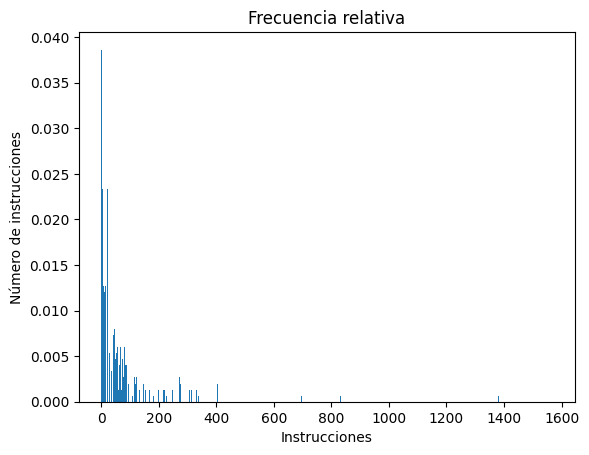

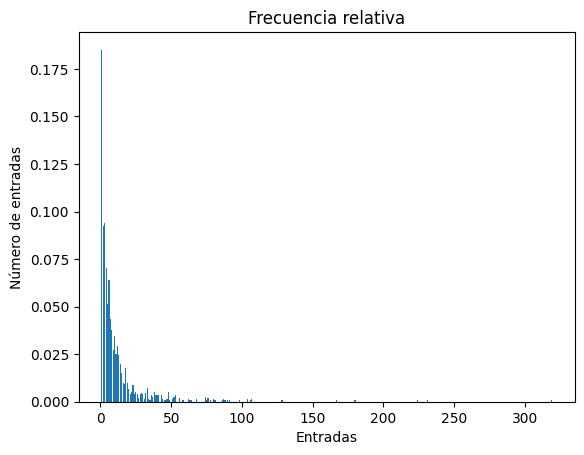

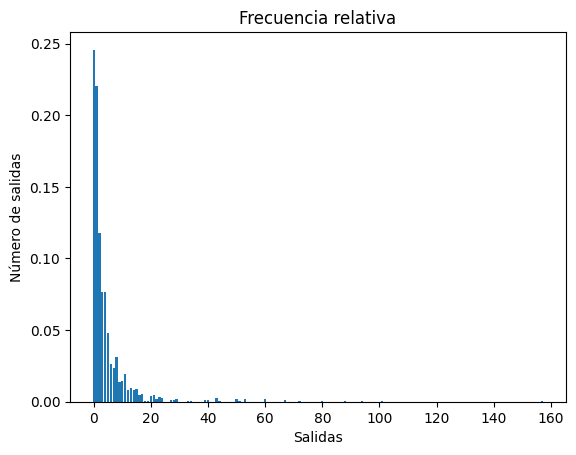

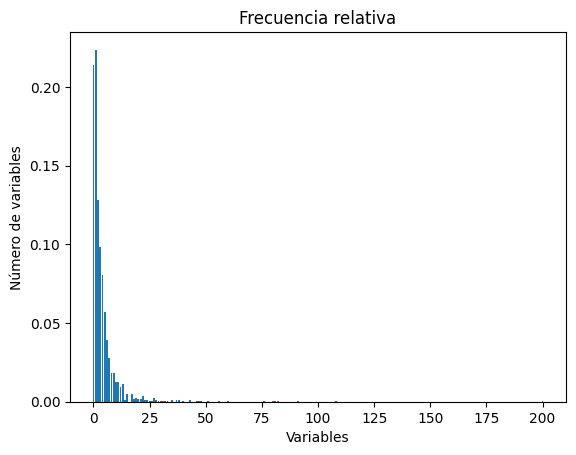

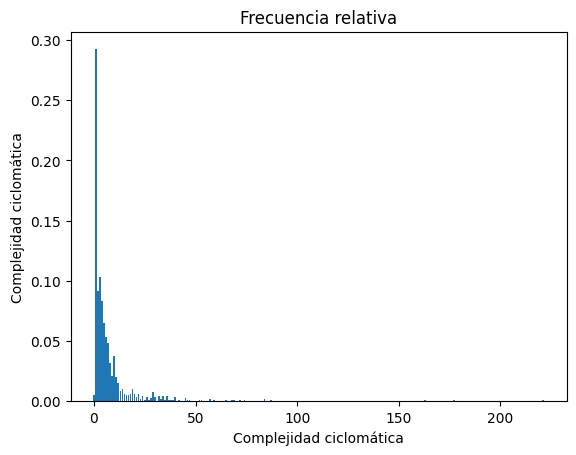

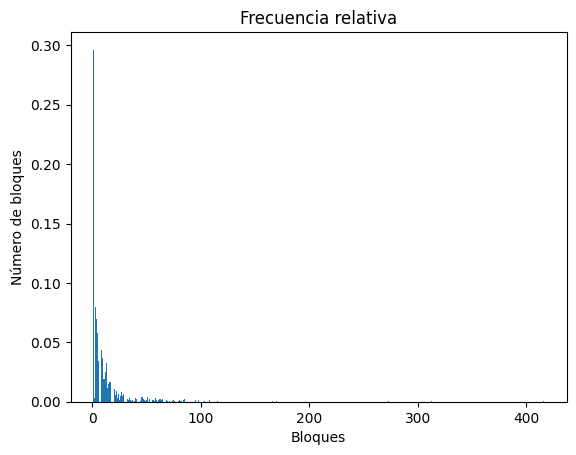

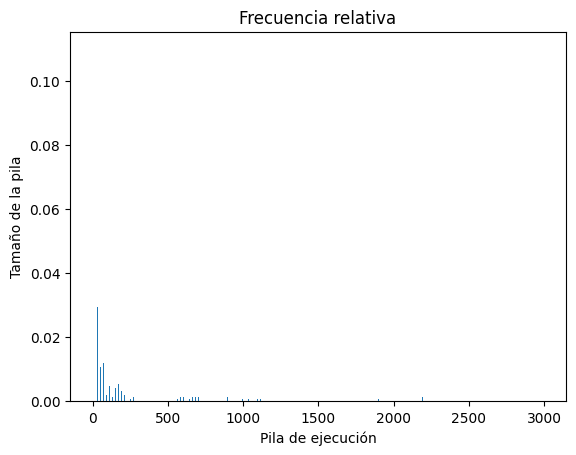

In [8]:
import r2pipe
from hashlib import blake2b
import time
from statistics import mean
import matplotlib.pyplot as plt 
import getopt, sys
import numpy

def feature_plot(features: list, xlabel: str, ylabel: str, title: str):
    res = {}
    for x in features:
        res[x] = features.count(x)/len(features)

    x = []
    y = []
    for x_val, y_val in sorted(res.items()):
        x.append(x_val)
        y.append(y_val)

    '''
    for i in range(0, max(res)):
        if x.count(i) == 0:
            x.append(i)
            y.append(0)
    '''

    plt.bar(x, y) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(title) 
    plt.show() 

# Pesos por defecto para la comparación de CCBHash
weights = {'name': 0.01, 
           'indegree': 0.03,
           'outdegree': 0.03, 
           'nlocals': 0.03, 
           'nargs': 0.03,
           'ninstrs': 0.13, 
           'ccomplexity': 0.14, 
           'nblocks': 0.04,
           'cfg': 0.28,
           'opcodes': 0.28}

def features_to_hashes(features: dict[str, ]):
    fuzzy_hash = {}
    for feature, value in features.items():
        if feature == 'name':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'indegree':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'outdegree':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'nlocals':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'nargs':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'ninstrs':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'ccomplexity':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'nblocks':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'cfg':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()
        elif feature == 'opcodes':
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()

files = ["/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Wannacry/be22645c61949ad6a077373a7d6cd85e3fae44315632f161adc4c99d5a8e6844",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Ryuk/781bc4dcbd459893397a8b987bf697f5b95435dfaf7fe3f4d2224728e7a2202a",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Ryuk/40b865d1c3ab1b8544bcf57c88edd30679870d40b27d62feb237a19f0c5f9cd1",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Darkside/06cfe7f5d88e82f7adda6d8333ca8b302debb22904c68a942188be5730e9b3c8",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Darkside/f8dbe9a85ea88c79c7dbf0f884a85a2726f7fba874b9bded3e10bd084800cd5d",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Zeus/d6fe8dede438757303c9d448ba3e8bd862d0197863956ff4a00c279a6a2f5e16",
         "/Users/pabloperezjimenez/Desktop/DescargasVT/Zeus/b459459743d426fa42d5ce5470238dcab7454250d347f7a055f6164711c9a14c"]

ninstructions = []
indegrees = []
outdegrees = []
nbbs = []
ccs = []
nvariables = []
stackframes = []
for file in files:
    error = True
    while error:
        try:
            r2 = r2pipe.open(file)
            r2.cmd("aaa")

            jsn = r2.cmdj("aflj")

            cont = 0
            mean_indegree = 0
            mean_outdegree = 0
            mean_nlocals = 0
            mean_nargs = 0
            mean_nvariables = 0
            f_ninstrs = []
            f_indegree = []
            f_outdegree = []
            f_nvariables = []
            f_cc = []
            f_nbbs = []
            f_stackframe = []
            for function in jsn:
                r2.cmd("s {}".format(function["offset"]))
                fcode = r2.cmdj("agj")
                nlocals = 0 if "nlocals" not in function else function["nlocals"]
                nargs = 0 if "nargs" not in function else function["nargs"]

                f_ninstrs.append(function["ninstrs"])
                f_indegree.append(function["indegree"])
                f_outdegree.append(function["outdegree"])
                f_nvariables.append(nlocals + nargs)
                f_cc.append(function["cc"])
                f_nbbs.append(function["nbbs"])
                f_stackframe.append(function["stackframe"])

            error = False
            for x in f_ninstrs: ninstructions.append(x)
            for x in f_indegree: indegrees.append(x)
            for x in f_outdegree: outdegrees.append(x)
            for x in f_nvariables: nvariables.append(x)
            for x in f_cc: ccs.append(x)
            for x in f_nbbs: nbbs.append(x)
            for x in f_stackframe: stackframes.append(x)
        except Exception as err:
            print(err)

ninstructions.sort()
indegrees.sort()
outdegrees.sort()
nvariables.sort()
ccs.sort()
nbbs.sort()
stackframes.sort()

'''
# quantiles_ins = [*range(1, 256)]
# quantiles_ins = [x / 256 for x in quantiles_ins]

quantiles = [*range(1, 16)]
quantiles = [x / 16 for x in quantiles]

q_ninstrs = numpy.quantile(ninstructions, quantiles)
q_indegree = numpy.quantile(indegrees, quantiles)
q_outdegree = numpy.quantile(outdegrees, quantiles)
q_nvaribles = numpy.quantile(nvariables, quantiles)
q_ccs = numpy.quantile(ccs, quantiles)
q_nbbs = numpy.quantile(nbbs, quantiles)
q_stackframes = numpy.quantile(stackframes, quantiles)

print(q_ninstrs)
print(q_indegree)
print(q_outdegree)
print(q_nvaribles)
print(q_ccs)
print(q_nbbs)
print(q_stackframes)
'''

## Plot de la frecuencia relativa
feature_plot(ninstructions, 'Instrucciones', 'Número de instrucciones', 'Frecuencia relativa')
feature_plot(indegrees, 'Entradas', 'Número de entradas', 'Frecuencia relativa')
feature_plot(outdegrees, 'Salidas', 'Número de salidas', 'Frecuencia relativa')
feature_plot(nvariables, 'Variables', 'Número de variables', 'Frecuencia relativa')
feature_plot(ccs, 'Complejidad ciclomática', 'Complejidad ciclomática', 'Frecuencia relativa')
feature_plot(nbbs, 'Bloques', 'Número de bloques', 'Frecuencia relativa')
feature_plot(stackframes, 'Pila de ejecución', 'Tamaño de la pila', 'Frecuencia relativa')

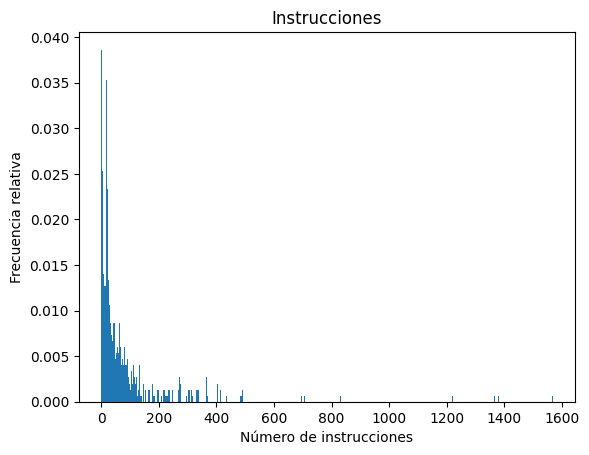

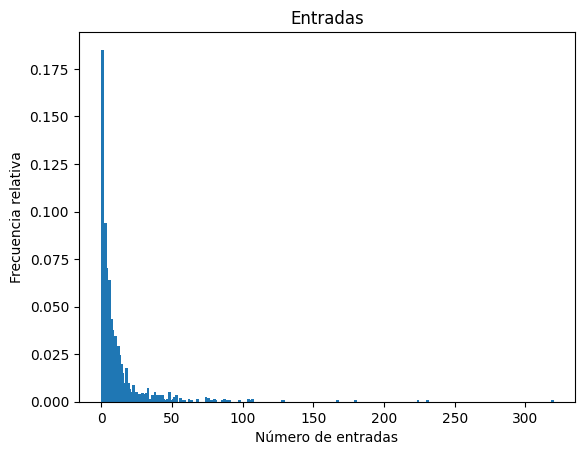

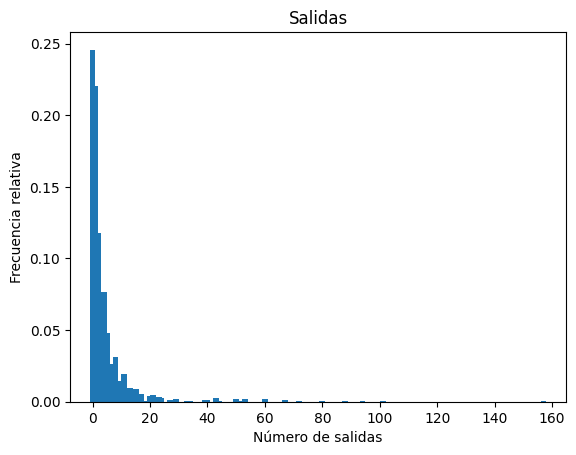

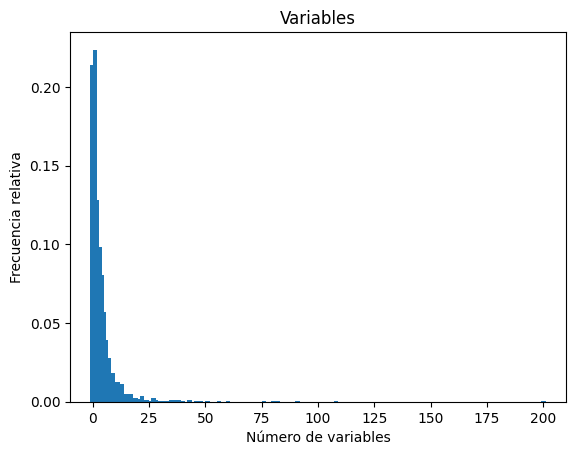

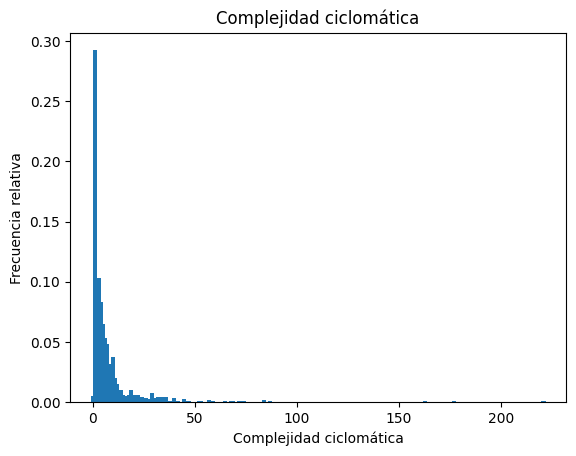

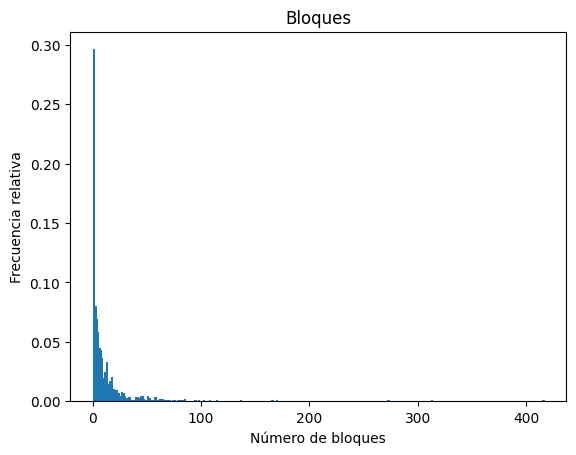

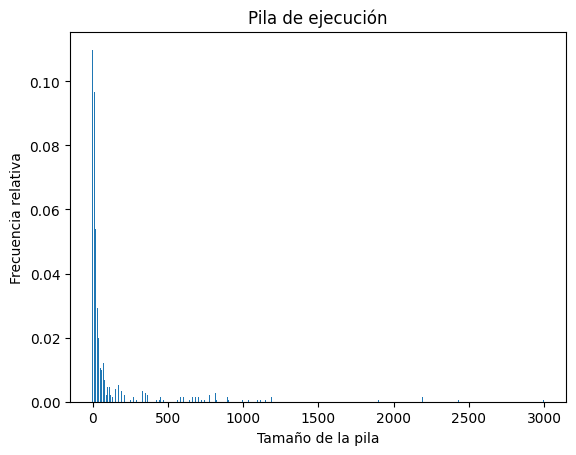

In [30]:
def feature_plot2(features: list, xlabel: str, ylabel: str, title: str):
    res = {}
    for x in features:
        res[x] = features.count(x)/len(features)

    x = []
    y = []
    for x_val, y_val in sorted(res.items()):
        x.append(x_val)
        y.append(y_val)

    '''
    for i in range(0, max(res)):
        if x.count(i) == 0:
            x.append(i)
            y.append(0)
    '''
    
    plt.bar(x, y, width=2)
    # plt.plot(x, y) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(title) 
    plt.xlim(-0.05*max(x), max(x)*1.05)
    plt.ylim(0, max(y)*1.05)
    plt.show() 

feature_plot2(ninstructions, 'Número de instrucciones', 'Frecuencia relativa', 'Instrucciones')
feature_plot2(indegrees, 'Número de entradas', 'Frecuencia relativa', 'Entradas')
feature_plot2(outdegrees, 'Número de salidas', 'Frecuencia relativa', 'Salidas')
feature_plot2(nvariables, 'Número de variables', 'Frecuencia relativa', 'Variables')
feature_plot2(ccs, 'Complejidad ciclomática', 'Frecuencia relativa', 'Complejidad ciclomática')
feature_plot2(nbbs, 'Número de bloques', 'Frecuencia relativa', 'Bloques')
feature_plot2(stackframes, 'Tamaño de la pila', 'Frecuencia relativa', 'Pila de ejecución')

In [34]:
quantiles_ins = [*range(1, 256)]
quantiles_ins = [x / 256 for x in quantiles_ins]

quantiles = [*range(1, 16)]
quantiles = [x / 16 for x in quantiles]

q_ninstrs = numpy.quantile(ninstructions, quantiles_ins)
q_indegree = numpy.quantile(indegrees, quantiles)
q_outdegree = numpy.quantile(outdegrees, quantiles)
q_nvaribles = numpy.quantile(nvariables, quantiles)
q_ccs = numpy.quantile(ccs, quantiles)
q_nbbs = numpy.quantile(nbbs, quantiles)
q_stackframes = numpy.quantile(stackframes, quantiles)

print(q_ninstrs[-16:])
print(q_indegree)
print(q_outdegree)
print(q_nvaribles)
print(q_ccs)
print(q_nbbs)
print(q_stackframes)

[214.1875     219.         227.9140625  235.77734375 245.84375
 268.         272.         276.         302.         314.
 332.640625   356.45703125 404.         449.84375    517.0703125
 845.1953125 ]
[ 1.  1.  2.  2.  3.  4.  4.  6.  7.  8. 10. 12. 15. 22. 38.]
[ 0.  0.  0.  1.  1.  1.  1.  2.  2.  3.  4.  5.  7.  9. 14.]
[ 0.      0.      0.      1.      1.      1.      1.6875  2.      2.
  3.      4.      5.      6.      8.     12.    ]
[ 1.  1.  1.  1.  2.  2.  3.  4.  4.  5.  6.  8. 10. 13. 24.]
[ 1.     1.     1.     1.     3.     3.     4.     5.     7.     8.
 11.    13.    17.    22.375 43.   ]
[  0.     4.     4.     8.    12.    12.    16.    20.    24.    28.
  40.    55.    80.   180.   619.75]


In [41]:
## Midiendo tiempos de CCBHash
import os
import time
from ccbhash import *

main_dir = '/Users/pabloperezjimenez/Desktop/DescargasVT'
dirs = os.listdir(main_dir)
try: dirs.remove('.DS_Store')
except: pass

files: dict[str, list[str]] = {}
for dir in dirs:
    files[dir] = os.listdir(f'{main_dir}/{dir}')
    try: files[dir].remove('.DS_Store')
    except: pass

hashes: dict[str, dict[str, list]] = {}
for dir, list_files in files.items():
    hashes[dir] = {}
    for file in list_files:
        inicio = time.time()
        hashes[dir][file] = calculate_ccbhash(f'{main_dir}/{dir}/{file}')
        fin = time.time()
        print(f'{dir}/{file} --> Tiempo ejecución: {round(fin-inicio, 2)} seconds')

Calculate CCBHash: 0.9 seconds
Darkside/516664139b0ddd044397a56482d7308d87c213c320a3151ccb9738e8f932654b --> Tiempo ejecución: 6.67 seconds
Calculate CCBHash: 0.6 seconds
Darkside/f8dbe9a85ea88c79c7dbf0f884a85a2726f7fba874b9bded3e10bd084800cd5d --> Tiempo ejecución: 4.43 seconds
Calculate CCBHash: 0.33 seconds
Darkside/1667e1635736f2b2ba9727457f995a67201ddcd818496c9296713ffa18e17a43 --> Tiempo ejecución: 3.04 seconds
Calculate CCBHash: 38.26 seconds
Darkside/b33e532853f158c7b9d289bb686ee68f6a2d877f7cb2cc4ae21016f042510103 --> Tiempo ejecución: 73.75 seconds
Calculate CCBHash: 0.32 seconds
Darkside/6836ec8588b8049bcd57cd920b7a75f1e206e5e8bb316927784afadb634ea4d8 --> Tiempo ejecución: 2.89 seconds
Calculate CCBHash: 0.64 seconds
Darkside/8cfd28911878af048fb96b6cc0b9da770542576d5c2b20b193c3cfc4bde4d3bc --> Tiempo ejecución: 4.46 seconds
Calculate CCBHash: 0.82 seconds
Darkside/06cfe7f5d88e82f7adda6d8333ca8b302debb22904c68a942188be5730e9b3c8 --> Tiempo ejecución: 5.72 seconds
Calculate CCB

Media de Darkside CCBHash: 0.00765338332284554 segundos
Media de Darkside completo: 0.04864073111669852 segundos
Media de Wannacry CCBHash: 0.008715088014167184 segundos
Media de Wannacry completo: 0.1450562767902513 segundos
Media de Ryuk CCBHash: 0.010378245290610929 segundos
Media de Ryuk completo: 0.04115134394128723 segundos
Media de Zeus CCBHash: 0.00450890473877605 segundos
Media de Zeus completo: 0.023345184367130702 segundos


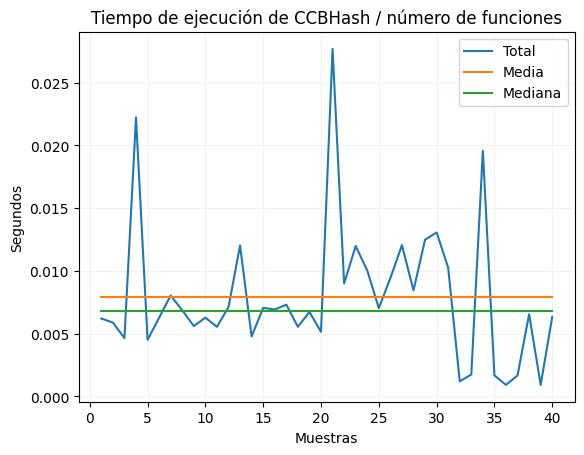

Media de CCBHash: 0.007919059923484704
Mediana de CCBHash: 0.006796757164404223


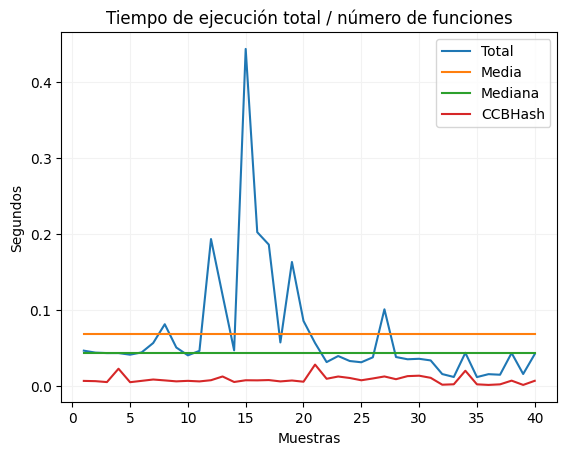

Media de tiempo de ejecución: 0.06759116136441995
Mediana de tiempo de ejecución: 0.04290536946256271


In [80]:
## Tiempos para distintas familias de malware
import matplotlib.pyplot as plt 
import numpy as np

Darkside_CCBHash = [0.9, 0.6, 0.33, 38.26, 0.32, 0.64, 0.82, 0.7, 1.11, 0.91]
Darkside_all = [6.67, 4.43, 3.04, 73.75, 2.89, 4.46, 5.72, 8.24, 9.93, 5.78]
# Darkside_functions = [130, 90, 63, 695, 63, 90, 90, 90, 155, 130]
Darkside_functions = [145, 102, 71, 1721, 71, 102, 102, 102, 198, 145]

Wannacry_CCBHash = [0.56, 0.37, 2.49, 0.43, 0.36, 0.36, 0.38, 0.56, 0.35, 0.52, 19.74]
Wannacry_all = [4.62, 10.03, 24.67, 4.18, 22.6, 10.5, 9.65, 5.74, 8.46, 8.6, 39.97]
Wannacry_functions = [101, 52, 207, 90, 51, 52, 52, 101, 52, 101, 713]
# Wannacry_functions = [122, 136, 207, 90, 167, 136, 136, 122, 122, 122, 906]

Ryuk_CCBHash = [3.33, 3.51, 2.66, 2.32, 3.6, 9.97, 3.26, 6.33, 7.04, 3.9]
Ryuk_all = [11.46, 11.41, 8.58, 10.14, 14.24, 83.06, 14.53, 17.58, 19.03, 12.6]
# Ryuk_functions = [320, 316, 285, 191, 304, 313, 241, 415, 435, 316]
Ryuk_functions = [370, 293, 265, 330, 382, 827, 386, 507, 539, 380]

Zeus_CCBHash = [0.17, 0.95, 15.81, 0.93, 0.13, 0.91, 0.93, 0.13, 0.9]
Zeus_all = [2.16, 6.18, 34.89, 6.22, 2.14, 7.8, 6.1, 2.17, 5.89]
# Zeus_functions = [33, 102, 605, 102, 33, 102, 102, 33, 102]
Zeus_functions = [142, 544, 808, 554, 142, 544, 142, 142, 142]

Darkside_CCBHash = np.divide(Darkside_CCBHash, Darkside_functions)
Darkside_all = np.divide(Darkside_all, Darkside_functions)

Wannacry_CCBHash = np.divide(Wannacry_CCBHash, Wannacry_functions)
Wannacry_all = np.divide(Wannacry_all, Wannacry_functions)

Ryuk_CCBHash = np.divide(Ryuk_CCBHash, Ryuk_functions)
Ryuk_all = np.divide(Ryuk_all, Ryuk_functions)

Zeus_CCBHash = np.divide(Zeus_CCBHash, Zeus_functions)
Zeus_all = np.divide(Zeus_all, Zeus_functions)

tiempos_ccbhash = list(Darkside_CCBHash) + list(Wannacry_CCBHash) + list(Ryuk_CCBHash) + list(Zeus_CCBHash)
# tiempos_ccbhash.sort()
tiempos_all = list(Darkside_all) + list(Wannacry_all) + list(Ryuk_all) + list(Zeus_all)
# tiempos_ccbhash.sort()

print(f'Media de Darkside CCBHash: {mean(list(Darkside_CCBHash))} segundos')
print(f'Media de Darkside completo: {mean(list(Darkside_all))} segundos')

print(f'Media de Wannacry CCBHash: {mean(list(Wannacry_CCBHash))} segundos')
print(f'Media de Wannacry completo: {mean(list(Wannacry_all))} segundos')

print(f'Media de Ryuk CCBHash: {mean(list(Ryuk_CCBHash))} segundos')
print(f'Media de Ryuk completo: {mean(list(Ryuk_all))} segundos')

print(f'Media de Zeus CCBHash: {mean(list(Zeus_CCBHash))} segundos')
print(f'Media de Zeus completo: {mean(list(Zeus_all))} segundos')

tiempos_ccbhash_sorted = tiempos_ccbhash.copy()
tiempos_ccbhash_sorted.sort()
median_ccbhash = (tiempos_ccbhash_sorted[19] + tiempos_ccbhash_sorted[20]) / 2

plt.plot([*range(1, 41)], tiempos_ccbhash, [1, 40], [mean(tiempos_ccbhash), mean(tiempos_ccbhash)], [1, 40], [median_ccbhash, median_ccbhash])
plt.xlabel('Muestras') 
plt.ylabel('Segundos') 
plt.title('Tiempo de ejecución de CCBHash / número de funciones') 
plt.legend(['Total', 'Media', 'Mediana'], loc=1)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.show() 

print(f'Media de CCBHash: {mean(tiempos_ccbhash)}')
print(f'Mediana de CCBHash: {median_ccbhash}')

tiempos_all_sorted = tiempos_all.copy()
tiempos_all_sorted.sort()
median_all = (tiempos_all_sorted[19] + tiempos_all_sorted[20]) / 2

plt.plot([*range(1, 41)], tiempos_all, [1, 40], [mean(tiempos_all), mean(tiempos_all)], [1, 40], [median_all, median_all], [*range(1, 41)], tiempos_ccbhash)
plt.xlabel('Muestras') 
plt.ylabel('Segundos') 
plt.title('Tiempo de ejecución total / número de funciones') 
plt.legend(['Total', 'Media', 'Mediana', 'CCBHash'], loc=1)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.show() 

print(f'Media de tiempo de ejecución: {mean(tiempos_all)}')
print(f'Mediana de tiempo de ejecución: {median_all}')

In [69]:
## Importando BBDD
import json

json_string = json.dumps(hashes)
with open('bbdd.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [3]:
## Probando funcionalidades

import os
import ccbhash
import r2pipe
from hashlib import blake2b

def _get_variables(finf):
    args = {}
    vars = {}

    try:
        for var_class in ['bpvars', 'spvars', 'regpvars']:
            for var in finf[0][var_class]:
                if var['kind'] == 'arg':
                    if var['type'] not in args: args[var['type']] = 1
                    else: args[var['type']] += 1 
                elif var['kind'] == 'var':
                    if var['type'] not in vars: vars[var['type']] = 1
                    else: vars[var['type']] += 1 
    except:
        pass
    
    args = dict(sorted(args.items()))
    vars = dict(sorted(vars.items()))

    args_line = ''
    vars_line = ''
    for f in args.keys():
        args_line += f + ';'
    for f in vars.keys():
        vars_line += f + ';'

    return {'args': args_line, 'vars': vars_line}

def _get_callgraph(function_name, global_callgraph):
    callgraph: dict[str, list[str]] = {}
    functions_id: dict[str, str] = {}
    functions_left: list[str] = []
    id_function = 0
    
    functions_left.append(function_name)
    while len(functions_left) > 0:
        actual_function = functions_left.pop(0)
        functions_id[actual_function] = str(id_function)
        id_function += 1
        for function in global_callgraph:
            if function['name'] == actual_function:
                if actual_function not in callgraph: callgraph[actual_function] = []
                for f in function['imports']:
                    if f not in callgraph[actual_function]: 
                        callgraph[actual_function].append(f)
                        if f not in functions_left: functions_left.append(f)
                break

    line = ''
    for name, outputs in callgraph.items():
        line += functions_id[name] + ':'
        for output in outputs:
            try:
                line += functions_id[output] + ','
            except:
                pass
        line = (line[:-1] if len(outputs) > 0 else line) + ";"

    return line

def _get_cfg(fcode):
    blocks_outputs: dict[str, list[str]] = {}
    blocks_id: dict[str, str] = {}
    id_block = 0

    for block in fcode[0]["blocks"]:
        blocks_outputs[hex(block["offset"])] = []
        blocks_id[hex(block["offset"])] = str(id_block)
        id_block += 1
        if "fail" in block: blocks_outputs[hex(block["offset"])].append(hex(block["fail"]))
        if "jump" in block: blocks_outputs[hex(block["offset"])].append(hex(block["jump"]))
        if len(blocks_outputs[hex(block["offset"])]) > 1: blocks_outputs[hex(block["offset"])].sort()

    line = ""
    for offset, outputs in blocks_outputs.items():
        line += blocks_id[offset] + ":"
        for output in outputs:
            try:
                line += blocks_id[output] + ","
            except:
                pass
        line = (line[:-1] if len(outputs) > 0 else line) + ";"

    return line

def _get_opcodes(fcode):
    opcodes: dict[str, int] = {}

    for block in fcode[0]["blocks"]:
        for instruction in block["ops"]:
            ins_type = str(instruction["type"])
            if ins_type == 'nop': continue
            ins_type = "cmp" if "cmp" in ins_type else ins_type
            ins_type = "jmp" if "jmp" in ins_type else ins_type
            ins_type = "call" if "call" in ins_type else ins_type
            ins_type = "push" if "push" in ins_type else ins_type
            if ins_type in opcodes:
                opcodes[ins_type] += 1
            else: 
                opcodes[ins_type] = 1
    
    opcodes = dict(sorted(opcodes.items()))

    line = ''
    for f in opcodes.keys():
        line += f + ';'

    return line

def features_to_hashes(features: dict[str, ]):
    fuzzy_hash: dict[str, ] = {}
    for feature, value in features.items():
        if feature in ('name', 'cfg', 'callgraph', 'opcodes', 'args', 'locals'):
            fuzzy_hash[feature] = blake2b(str.encode(value), digest_size=2).hexdigest()

    return fuzzy_hash

def calculate_ccbhash(file: str):
    '''
    Calculate all functions CCBHashes for given file.

    Args:
    - file (str): File for which the CCBHashes will be calculated

    Returns:
    - ccbhashes (dict[str, dict]): Functions CCBHashes
    '''

    f_hash: dict[str, dict] = {}
    f_attr: dict[str, dict] = {}
    jsn = []
    while len(jsn) == 0:
        r2 = r2pipe.open(file)
        r2.cmd("aaa")
        jsn = r2.cmdj("aflj")
    global_callgraph = r2.cmdj("agCj")
    for function in jsn:
        if function['ninstrs'] < 10 and function['nbbs'] < 2: continue
        r2.cmd(f"s {function['offset']}")
        fcode = r2.cmdj("agj")
        if len(fcode) == 0:
            print(f'[!!] Failed to get code from {function["name"]}')
            continue
        finf = r2.cmdj("afij")
        variables = _get_variables(finf)
        args = variables['args']
        locals = variables['vars']
        opcodes = _get_opcodes(fcode)
        cfg = _get_cfg(fcode)
        callgraph = _get_callgraph(function['name'], global_callgraph)
        f_attr[function['name']] = {'name': function['name'], 'args': args, 'locals': locals, 'opcodes': opcodes, 'cfg': cfg, 'callgraph': callgraph}
        f_hash[function['name']] = features_to_hashes(f_attr[function['name']])

    r2.quit()

    return f_hash, f_attr

main_dir = '/Users/pabloperezjimenez/Desktop/DescargasVT'
dirs = os.listdir(main_dir)
try: dirs.remove('.DS_Store')
except: pass

files: dict[str, list[str]] = {}
for dir in dirs:
    files[dir] = os.listdir(f'{main_dir}/{dir}')
    try: files[dir].remove('.DS_Store')
    except: pass

hashes: dict[str, dict[str, dict]] = {}
attrs: dict[str, dict[str, dict]] = {}
for dir, list_files in files.items():
    hashes[dir] = {}
    attrs[dir] = {}
    for file in list_files:
        hashes[dir][file], attrs[dir][file] = calculate_ccbhash(f'{main_dir}/{dir}/{file}')
        print(f'{dir}/{file} finished.')
    

Darkside/516664139b0ddd044397a56482d7308d87c213c320a3151ccb9738e8f932654b finished.
Darkside/f8dbe9a85ea88c79c7dbf0f884a85a2726f7fba874b9bded3e10bd084800cd5d finished.
Darkside/1667e1635736f2b2ba9727457f995a67201ddcd818496c9296713ffa18e17a43 finished.
Darkside/b33e532853f158c7b9d289bb686ee68f6a2d877f7cb2cc4ae21016f042510103 finished.
Darkside/6836ec8588b8049bcd57cd920b7a75f1e206e5e8bb316927784afadb634ea4d8 finished.
Darkside/8cfd28911878af048fb96b6cc0b9da770542576d5c2b20b193c3cfc4bde4d3bc finished.
Darkside/06cfe7f5d88e82f7adda6d8333ca8b302debb22904c68a942188be5730e9b3c8 finished.
Darkside/bac2149254f5ce314bab830f574e16c9d67e81985329619841431034c31646e0 finished.
Darkside/22d7d67c3af10b1a37f277ebabe2d1eb4fd25afbd6437d4377400e148bcc08d6 finished.
Darkside/f3f25af554bedfa4ee2824bb858280282bd87828d446048619dc49fe061741b4 finished.
Wannacry/14946ab29b5798b386d026e7472ff3eb27fc92fe914657467d8f198c439b1bea finished.
Wannacry/24d004a104d4d54034dbcffc2a4b19a11f39008a575aa614ea04703480b1022c fi

In [49]:
## Comparaciones

cont = 0
coincidencias = 0
hashes_coincidentes: dict[str, dict[str, set]] = {}
hashes_coincidentes['name'] = {}
hashes_coincidentes['args'] = {}
hashes_coincidentes['locals'] = {}
hashes_coincidentes['opcodes'] = {}
hashes_coincidentes['cfg'] = {}
hashes_coincidentes['callgraph'] = {}

for dir, a in hashes.items():
    for file, b in a.items():
        for func, c in b.items():
            for attr, hash in c.items():
                for dir2, a2 in hashes.items():
                    for file2, b2 in a2.items():
                        if file != file2:
                            for func2, c2 in b2.items():
                                    cont += 1
                                    if hash == c2[attr] and attrs[dir][file][func][attr] != attrs[dir2][file2][func2][attr]:
                                        if hash not in hashes_coincidentes[attr]:
                                            hashes_coincidentes[attr][hash] = set()
                                        hashes_coincidentes[attr][hash].add(attrs[dir][file][func][attr])
                                        hashes_coincidentes[attr][hash].add(attrs[dir2][file2][func2][attr])
                                        coincidencias += 1
                                        print(f'Coincidencia en {attr} ({hash}): {attrs[dir][file][func][attr]} --- {attrs[dir2][file2][func2][attr]}')

print(f'\nComparaciones: {cont}')
print(f'Coincidencias (totales): {coincidencias}')
print(f'Coincidencias (porcentaje): {round(100*coincidencias/cont, 2)}')

print(f'\n{hashes_coincidentes}')

Coincidencia en name (f938): fcn.0040b047 --- fcn.35075bfe
Coincidencia en name (f938): fcn.0040b047 --- fcn.004219d6
Coincidencia en name (b917): fcn.0040b0d5 --- fcn.004951d0
Coincidencia en name (7cd8): fcn.00401000 --- fcn.14d05532
Coincidencia en name (7cd8): fcn.00401000 --- fcn.14d05532
Coincidencia en name (7cd8): fcn.00401000 --- fcn.14d05532
Coincidencia en name (7cd8): fcn.00401000 --- fcn.14d05532
Coincidencia en name (7cd8): fcn.00401000 --- fcn.14d05532
Coincidencia en name (f581): fcn.00401aca --- fcn.3501127b
Coincidencia en name (4fd4): fcn.00405258 --- fcn.0042c393
Coincidencia en name (e636): fcn.00405760 --- fcn.00407e2f
Coincidencia en name (e636): fcn.00405760 --- fcn.00407e2f
Coincidencia en cfg (ec43): 0:1,3;1:2,3;2:3;3:4,5;4:5;5:; --- 0:1,38;1:2,3;2:;3:4,36;4:5,38;5:2,6;6:7,38;7:2,8;8:9,38;9:2,10;10:11,38;11:2,12;12:13,38;13:2,14;14:15,38;15:2,16;16:17,38;17:2,18;18:19,38;19:2,20;20:21,38;21:2,22;22:23,38;23:2,24;24:25,38;25:2,26;26:27,38;27:2,28;28:29,38;29:2,

In [41]:
import json

hashes_coincidentes2 = hashes_coincidentes.copy()
for attr, a in hashes_coincidentes.items():
    for hash, s in a.items():
        hashes_coincidentes2[attr][hash] = str(s)
json_string = json.dumps(hashes_coincidentes2)
with open('comparison.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [44]:
print(json.dumps(hashes_coincidentes2, indent=4))

{
    "name": {
        "f938": "{'fcn.0040b047', 'fcn.35075bfe', 'fcn.004219d6'}",
        "b917": "{'fcn.004951d0', 'fcn.0040b0d5'}",
        "7cd8": "{'fcn.00401000', 'fcn.14d05532'}",
        "f581": "{'fcn.3501127b', 'fcn.00401aca'}",
        "4fd4": "{'fcn.00405258', 'fcn.0042c393'}",
        "e636": "{'fcn.00405760', 'fcn.00407e2f'}",
        "a61e": "{'fcn.00a562bb', 'fcn.00408bab'}",
        "d960": "{'fcn.00408c28', 'fcn.0041e360'}",
        "b911": "{'fcn.35013e06', 'fcn.00409549'}",
        "b10f": "{'fcn.3500fe53', 'fcn.00403011'}",
        "c5ea": "{'fcn.004722f0', 'fcn.00401ef7'}",
        "4545": "{'fcn.00409c3a', 'fcn.0040d2d5'}",
        "d237": "{'fcn.00402c26', 'fcn.0040b34a'}",
        "db2a": "{'fcn.0040c467', 'fcn.004013da'}",
        "a0e6": "{'fcn.0040611a', 'fcn.00464c20'}",
        "6ee2": "{'fcn.00403bd8', 'fcn.00404eef'}",
        "a2df": "{'fcn.00404255', 'fcn.00466140'}",
        "2ad9": "{'fcn.0040285c', 'fcn.0049e1a0'}",
        "e766": "{'fcn.3500aa45'

In [50]:
'''
hashes_coincidentes2 = hashes_coincidentes.copy()
for attr, a in hashes_coincidentes.items():
    for hash, s in a.items():
        hashes_coincidentes2[attr][hash] = len(s)
'''
print(json.dumps(hashes_coincidentes2, indent=4))

{
    "name": {
        "f938": 3,
        "b917": 2,
        "7cd8": 2,
        "f581": 2,
        "4fd4": 2,
        "e636": 2,
        "a61e": 2,
        "d960": 2,
        "b911": 2,
        "b10f": 2,
        "c5ea": 2,
        "4545": 2,
        "d237": 2,
        "db2a": 2,
        "a0e6": 2,
        "6ee2": 2,
        "a2df": 2,
        "2ad9": 2,
        "e766": 2,
        "7aa4": 2,
        "2c2a": 2,
        "68d5": 2,
        "1d0d": 2,
        "be02": 2,
        "ff1a": 2,
        "a66e": 2,
        "18eb": 3,
        "2ee6": 2,
        "db8c": 2,
        "e590": 2,
        "8ace": 2,
        "2d3e": 2,
        "a806": 2,
        "2741": 2,
        "1874": 2,
        "352d": 2,
        "6cb6": 2,
        "6f9a": 2,
        "b63e": 2,
        "7f1e": 2,
        "8b68": 2,
        "0d63": 2,
        "97fe": 2,
        "3e55": 2,
        "19a3": 2,
        "0ba3": 2,
        "966f": 2,
        "b4c1": 2,
        "5532": 2,
        "da5d": 2,
        "d0da": 2,
        "ac4a":

In [1]:
## Calculando CCBHash de dataset benigno
import os
import ccbhash

hashes = {}
for (dir_path, dir_names, file_names) in os.walk('/'):
    if 'Downloads' in dir_path or 'Desktop' in dir_path:
        continue
    files = []
    for file in file_names:
        if file.endswith('.exe'):
            files.append(file)
    if len(files) > 0:
        for file in files:
            file_hash = ccbhash.calculate_ccbhash(f'{dir_path}/{file}')
            hashes[f'{dir_path}/{file}'] = file_hash
            print(f'{dir_path}/{file}: Hash calculated')

ccbhash.save_db(hashes, 'bbdd_good.json')
print(f'Database saved')

/usr/local/lib/node_modules/npm/node_modules/term-size/vendor/windows/term-size.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/w64-arm.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/w32.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/t32.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/w64.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/t64-arm.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/t64.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/setuptools/cli-arm64.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/setuptools/cli-64.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/setuptools/gui-64.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/setuptools/cli.exe: Hash calculated
/usr/local/lib/python3.9/site-packages/setuptools/cli-32.exe: Hash calculat

In [2]:
## Comparando dataset maligno y benigno
import ccbhash

bbdd_bad = ccbhash.get_db('bbdd.json')
bbdd_good = ccbhash.get_db('bbdd_good.json')

for file, hash in bbdd_good.items():
    for family, x in bbdd_bad.items():
        for file2, hash2 in x.items():
            _, similarity = ccbhash.compare_files(hash, hash2)
            if similarity != None and similarity > 0.8:
                print(f'Similitud entre {file} ({len(hash)} functions) -- {family}/{file2} ({len(hash2)} functions) = {similarity}')
                _, similarity2 = ccbhash.compare_files(hash2, hash)
                print(f'The other way = {similarity2}')



Similitud entre /usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/w32.exe (224 functions) -- Ryuk/79456569b6aba9d00e641ce0067a0b18e4fe69232d6c356201d1ab62ebfe4c8f (241 functions) = 0.8052678571428571
The other way = 0.7704564315352697
Similitud entre /usr/local/lib/python3.9/site-packages/pip/_vendor/distlib/t32.exe (226 functions) -- Ryuk/79456569b6aba9d00e641ce0067a0b18e4fe69232d6c356201d1ab62ebfe4c8f (241 functions) = 0.8034513274336283
The other way = 0.773941908713693
Similitud entre /usr/local/lib/python3.9/site-packages/setuptools/cli.exe (230 functions) -- Wannacry/e8337d20e27cb23f417f628e4b0ba1985ada02d939669fff9570313050a79b51 (713 functions) = 0.826304347826087
The other way = 0.5564656381486676
Similitud entre /usr/local/lib/python3.9/site-packages/setuptools/cli-32.exe (230 functions) -- Wannacry/e8337d20e27cb23f417f628e4b0ba1985ada02d939669fff9570313050a79b51 (713 functions) = 0.826304347826087
The other way = 0.5564656381486676
Similitud entre /usr/local/lib/pyt

In [5]:
h1 = ccbhash.calculate_ccbhash('/Applications/Visual Studio.app/Contents/Resources/lib/monodevelop/AddIns/MonoDevelop.AzureFunctions/azure-functions-cli/tools/python/packapp/distlib/w32.exe')
h2 = ccbhash.calculate_ccbhash('/Users/pabloperezjimenez/Desktop/DescargasVT/Ryuk/79456569b6aba9d00e641ce0067a0b18e4fe69232d6c356201d1ab62ebfe4c8f')
a, b = ccbhash.compare_files(h2, h1)
print(a)

{'loc.004041ba': (0.99, 'loc.0040324d'), 'fcn.00405df0': (0.99, 'fcn.004043ea'), 'fcn.00408056': (0.99, 'fcn.00404bf1'), 'fcn.00407ea7': (0.99, 'fcn.00404a42'), 'fcn.00407e2f': (0.99, 'fcn.00401f3a'), 'fcn.00407cd9': (0.99, 'fcn.00401de4'), 'fcn.00403e5e': (0.99, 'fcn.00401f8c'), 'fcn.00405253': (0.99, 'fcn.00403ad0'), 'fcn.00405211': (0.99, 'fcn.00403a8e'), 'fcn.00403e98': (0.99, 'fcn.00402210'), 'fcn.004051d4': (0.99, 'fcn.00403a51'), 'fcn.004042c0': (0.99, 'fcn.004059dc'), 'fcn.00405c40': (0.99, 'fcn.0040566e'), 'fcn.004054bf': (0.99, 'fcn.00404eed'), 'fcn.004076dd': (0.99, 'fcn.0040346b'), 'fcn.0040a7c1': (0.99, 'fcn.00403f1a'), 'fcn.0040bb10': (0.99, 'fcn.0040740e'), 'fcn.0040774b': (0.99, 'fcn.004034d9'), 'fcn.00407b96': (0.99, 'fcn.00401ca1'), 'fcn.0040809e': (0.99, 'fcn.0040428b'), 'fcn.00407b78': (0.99, 'fcn.00404c2a'), 'fcn.0040401a': (0.99, 'fcn.004030ad'), 'fcn.00407beb': (0.99, 'fcn.00401cf6'), 'fcn.0040bfa6': (0.99, 'fcn.00404059'), 'fcn.0040a709': (0.99, 'fcn.00403e62'),

In [6]:
import os
import r2pipe

def __get_cfg(fcode):
    blocks_outputs: dict[str, list[str]] = {}
    blocks_id: dict[str, str] = {}
    id_block = 0

    for block in fcode[0]["blocks"]:
        blocks_outputs[hex(block["offset"])] = []
        blocks_id[hex(block["offset"])] = str(id_block)
        id_block += 1
        if "fail" in block: blocks_outputs[hex(block["offset"])].append(hex(block["fail"]))
        if "jump" in block: blocks_outputs[hex(block["offset"])].append(hex(block["jump"]))
        if len(blocks_outputs[hex(block["offset"])]) > 1: blocks_outputs[hex(block["offset"])].sort()

    line = ""
    for offset, outputs in blocks_outputs.items():
        line += blocks_id[offset] + ":"
        for output in outputs:
            try:
                line += blocks_id[output] + ","
            except:
                pass
        line = (line[:-1] if len(outputs) > 0 else line) + ";"

    return line

def _calculate_ccbhash(file: str):
    '''
    Calculate all functions CCBHashes for given file.

    Args:
    - file (str): File for which the CCBHashes will be calculated

    Returns:
    - ccbhashes (dict[str, dict]): Functions CCBHashes
    '''

    f_attr: dict[str, str] = {}
    jsn = []
    while len(jsn) == 0:
        r2 = r2pipe.open(file)
        r2.cmd("aaa")
        jsn = r2.cmdj("aflj")
    global_callgraph = r2.cmdj("agCj")
    for function in jsn:
        if function['ninstrs'] < 10 and function['nbbs'] < 2: continue
        r2.cmd(f"s {function['offset']}")
        fcode = r2.cmdj("agj")
        if len(fcode) == 0:
            print(f'[!!] Failed to get code from {function["name"]}')
            continue
        finf = r2.cmdj("afij")
        cfg = __get_cfg(fcode)
        f_attr[function['name']] = cfg

    r2.quit()

    return f_attr

main_dir = '/Users/pabloperezjimenez/Desktop/DescargasVT'
dirs = os.listdir(main_dir)
try: dirs.remove('.DS_Store')
except: pass

files: dict[str, list[str]] = {}
for dir in dirs:
    files[dir] = os.listdir(f'{main_dir}/{dir}')
    try: files[dir].remove('.DS_Store')
    except: pass

attrs: dict[str, dict[str, str]] = {}
for dir, list_files in files.items():
    for file in list_files:
        # attrs[dir][file] = _calculate_ccbhash(f'{main_dir}/{dir}/{file}')
        attrs[f'{dir}/{file}'] = _calculate_ccbhash(f'{main_dir}/{dir}/{file}')
        print(f'{dir}/{file} finished.')

Darkside/516664139b0ddd044397a56482d7308d87c213c320a3151ccb9738e8f932654b finished.
Darkside/f8dbe9a85ea88c79c7dbf0f884a85a2726f7fba874b9bded3e10bd084800cd5d finished.
Darkside/1667e1635736f2b2ba9727457f995a67201ddcd818496c9296713ffa18e17a43 finished.
Darkside/b33e532853f158c7b9d289bb686ee68f6a2d877f7cb2cc4ae21016f042510103 finished.
Darkside/6836ec8588b8049bcd57cd920b7a75f1e206e5e8bb316927784afadb634ea4d8 finished.
Darkside/8cfd28911878af048fb96b6cc0b9da770542576d5c2b20b193c3cfc4bde4d3bc finished.
Darkside/06cfe7f5d88e82f7adda6d8333ca8b302debb22904c68a942188be5730e9b3c8 finished.
Darkside/bac2149254f5ce314bab830f574e16c9d67e81985329619841431034c31646e0 finished.
Darkside/22d7d67c3af10b1a37f277ebabe2d1eb4fd25afbd6437d4377400e148bcc08d6 finished.
Darkside/f3f25af554bedfa4ee2824bb858280282bd87828d446048619dc49fe061741b4 finished.
Wannacry/14946ab29b5798b386d026e7472ff3eb27fc92fe914657467d8f198c439b1bea finished.
Wannacry/24d004a104d4d54034dbcffc2a4b19a11f39008a575aa614ea04703480b1022c fi

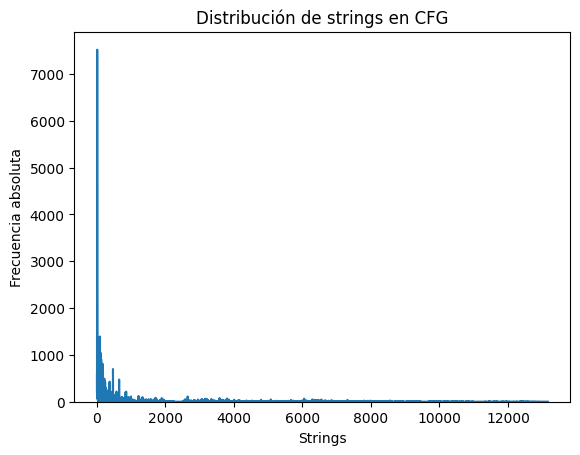

In [15]:
import matplotlib.pyplot as plt 
import numpy as np

cfgs: dict[str, int] = {}
for file, attr2 in attrs.items():
    for func, cfg in attr2.items():
        blocks = cfg.split(';')
        for block in blocks:
            if block in cfgs:
                cfgs[block] += 1
            else: 
                cfgs[block] = 1

def feature_plot(cfgs: dict, xlabel: str, ylabel: str, title: str):
    x = [i for i in range(len(cfgs))]
    y = [y for x, y in cfgs.items()]
    
    # plt.bar(x, y, width=100)
    plt.plot(x, y) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(title) 
    plt.xlim(-0.05*max(x), max(x)*1.05)
    plt.ylim(0, max(y)*1.05)
    plt.show() 

feature_plot(cfgs, 'Strings', 'Frecuencia absoluta', 'Distribución de strings en CFG')